<a href="https://www.kaggle.com/code/nirmit27/parkinson-s-disease-prediction?scriptVersionId=175080091" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split as tts

from sklearn import svm

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as CM

# **Parkinson's Disease** Prediction
---

### Importing the dataset

In [2]:
path_ = ""

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path_ = os.path.join(dirname, filename)
        
df = pd.read_csv(path_)

## Exploring the dataset

In [3]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


### Dimensions of the dataset

In [4]:
df.shape

(195, 24)

### Description of the dataset

In [5]:
df.describe()
# df.info()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Status distribution
- `1` indicates **Parkinson's**
- `0` indicates **Healthy**
> In this dataset, there are `147` cases with Parkinson's and `48` Healthy cases.

In [6]:
df.status.value_counts()

status
1    147
0     48
Name: count, dtype: int64

### Mean readings
> Determining the **mean difference** in readings based on whether or not the patient has Parkinson's.

In [7]:
df.iloc[:, 1:].groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


## Data Preprocessing
### Features and target

In [8]:
X = df.drop(columns=['name', 'status'], axis=1).values
y = df.status.values

X

array([[1.199920e+02, 1.573020e+02, 7.499700e+01, ..., 2.664820e-01,
        2.301442e+00, 2.846540e-01],
       [1.224000e+02, 1.486500e+02, 1.138190e+02, ..., 3.355900e-01,
        2.486855e+00, 3.686740e-01],
       [1.166820e+02, 1.311110e+02, 1.115550e+02, ..., 3.111730e-01,
        2.342259e+00, 3.326340e-01],
       ...,
       [1.746880e+02, 2.400050e+02, 7.428700e+01, ..., 1.584530e-01,
        2.679772e+00, 1.317280e-01],
       [1.987640e+02, 3.969610e+02, 7.490400e+01, ..., 2.074540e-01,
        2.138608e+00, 1.233060e-01],
       [2.142890e+02, 2.602770e+02, 7.797300e+01, ..., 1.906670e-01,
        2.555477e+00, 1.485690e-01]])

### Splitting the data

In [9]:
test_size = 0.2
X_train, X_test, y_train, y_test = tts(X, y, test_size=test_size, random_state=27)

X_train.shape

(156, 22)

### Scaling the data through standardization
> Fit the scaler with ONLY the **training** data and transform both the training and test splits.

In [10]:
ss = SS()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

X_train

array([[ 0.10064159,  2.98440312, -0.99670691, ...,  0.59219627,
         0.75061233, -0.36114706],
       [-0.62515645, -0.49715322, -0.91376773, ...,  1.04669957,
         0.74366955,  1.70914889],
       [ 2.00196036,  0.625758  , -0.31705134, ..., -0.65253379,
        -0.36728989, -0.9204013 ],
       ...,
       [-0.82925667, -0.62514846, -0.11283273, ...,  1.27963822,
        -0.45045158, -0.16080692],
       [-0.90805871,  0.30262931, -0.37635151, ..., -0.22742046,
        -0.68365599,  0.55108004],
       [ 0.05641297, -0.03293061,  0.59890436, ...,  1.41654497,
         1.34560715,  1.32374298]])

## Model Training - **Support Vector Machine**
---

### Training

In [11]:
model = svm.SVC()
model.fit(X_train, y_train)

model

SVC()

### Performance evaluation

In [12]:
y_pred = model.predict(X_test)

print(f"Model accuracy : {round(acc(y_test, y_pred) * 100, 2)}%")

Model accuracy : 89.74%


### Confusion Matrix

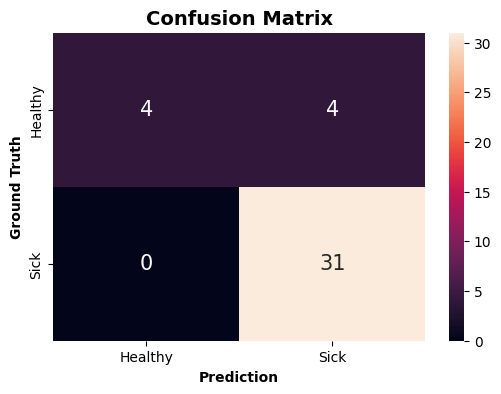

In [13]:
plt.figure(figsize=(6, 4))

axis_labels = ['Healthy', 'Sick']

cm = CM(y_test, y_pred)
sns.heatmap(cm, annot=True, annot_kws={"size": 15}, xticklabels=axis_labels, yticklabels=axis_labels)

plt.title("Confusion Matrix", fontweight='bold', fontsize=14)
plt.xlabel("Prediction", fontsize=10, fontweight='bold')
plt.ylabel("Ground Truth", fontsize=10, fontweight='bold')

plt.show()

### Predictive system

In [14]:
input_data = np.array([117.27400,129.91600,110.40200,0.00752,0.00006,0.00299,0.00469,0.00898,0.02293,0.22100,0.01189,0.01459,0.01948,0.03568,0.00681,22.81700,0.530529,0.817756,-4.608260,0.290024,2.021591,0.314464
])
input_data = input_data.reshape(1, -1)
input_data = ss.transform(input_data)

print("Parkinson's suspected.") if model.predict(input_data)[0] else print("Healthy case.")

Parkinson's suspected.
